In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('cutWord.csv', sep='\t', names=['word'], header=None)
df

,word
0,Column1.desc
1,คาเฟ่สวย มาชมนกแก้ว ให้อาหารปลาคราฟ ทานอาหารร...
2,⛅️ วันหยุดเสาร์อาทิตย์ใครยังไม่มีแพลนจะไปเที่ย...
3,หนีความวุ่นวายมาพักกายที่ภาคเหนือ ❄️🍃 @ชื่อบิว...
4,#ฤดูฝน #อากาศกรุงเทพ #ฝุ่นกรุงเทพ #เที่ยวกรุงเ...
...,...
129,คลิปดองงจนเน่าแล้ว#ขุนตาล #นั่งรถไฟ #เชียงใหม่...
130,พกสิ่งนี้ไปสู้กับฝุ่นที่อินเดีย @กาญเดินทาง✈️ ...
131,#จอดจนฝุ่นจับ #สมุทรปราการ #TikTokกินเที่ยว #พ...
132,#มูลนิธิสถาบันราชพฤกษ์ #เติมเต็มวิสาหกิจเพื่อส...


In [3]:
from pythainlp.corpus.common import thai_stopwords
thai_stopwords = list(thai_stopwords())
thai_stopwords

['เป็นที่สุด',
 'เธอ',
 'ไป่',
 'เสร็จแล้ว',
 'น้อยๆ',
 'ร่วม',
 'เข้า',
 'นาง',
 'ส่วนน้อย',
 'บ่อยครั้ง',
 'ยิ่งเมื่อ',
 'หาก',
 'นานๆ',
 'เลย',
 'ด้วยประการฉะนี้',
 'หากแม้น',
 'ทันใดนั้น',
 'ประการหนึ่ง',
 'รวมๆ',
 'ตลอดวัน',
 'พอๆ',
 'ฯ',
 'ประการ',
 'วันไหน',
 'เช่นดังก่อน',
 'ต่อ',
 'ควร',
 'มั้ยเนี่ย',
 'เป็นเพียง',
 'ในที่',
 'ให้มา',
 'สิ่งไหน',
 'แล้วกัน',
 'อย่างน้อย',
 'ทุกครา',
 'ล่าสุด',
 'ตลอดจน',
 'ถึงบัดนี้',
 'แต่ถ้า',
 'ยืนยง',
 'แค่เพียง',
 'ร่วมกัน',
 'อนึ่ง',
 'พวกโน้น',
 'เพียงเพราะ',
 'ส่วนที่',
 'จึงเป็น',
 'ทุกวัน',
 'เล็ก',
 'ช่วงแรก',
 'ที่จริง',
 'อยู่',
 'จัดหา',
 'ขึ้น',
 'ผล',
 'คล้ายว่า',
 'เสียจนถึง',
 'รวมทั้ง',
 'พวกฉัน',
 'เป็นอาทิ',
 'นู่น',
 'ตั้งแต่',
 'หาใช่',
 'มอง',
 'เฉยๆ',
 'ฉะนี้',
 'ค่อนข้าง',
 'ทุกครั้ง',
 'มั้ยนะ',
 'บางครั้ง',
 'ค่อยไปทาง',
 'เฉกเช่น',
 'ขณะใดๆ',
 'สืบเนื่อง',
 'เพราะ',
 'อย่างนี้',
 'เท่านั้น',
 'กำลัง',
 'บ่อย',
 'จำ',
 'รวมด้วย',
 '\ufeffๆ',
 'หรือไม่',
 'บางๆ',
 'ภายหลัง',
 'เดียว',
 'ยิ่งขึ้น',
 'ช้าๆ',
 'ที่ได้',

In [4]:
from pythainlp import word_tokenize
def text_process(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ","#","@")) #ตัวที่จะตัดทิ้ง
    final = word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() 
                     if word.lower not in thai_stopwords)
    return final
df['text_tokens'] = df['word'].apply(text_process)
df

,word,text_tokens
0,Column1.desc,Column 1 desc
1,คาเฟ่สวย มาชมนกแก้ว ให้อาหารปลาคราฟ ทานอาหารร...,คาเฟ่ สวย มา ชม นกแก้ว ให้อาหาร ปลา ครา ฟ ทานอ...
2,⛅️ วันหยุดเสาร์อาทิตย์ใครยังไม่มีแพลนจะไปเที่ย...,⛅️ วันหยุด เสาร์ อาทิตย์ ใคร ยัง ไม่ มี แพลน จ...
3,หนีความวุ่นวายมาพักกายที่ภาคเหนือ ❄️🍃 @ชื่อบิว...,หนี ความวุ่นวาย มา พัก กาย ที่ ภาคเหนือ ❄️🍃 ชื...
4,#ฤดูฝน #อากาศกรุงเทพ #ฝุ่นกรุงเทพ #เที่ยวกรุงเ...,ฤดูฝน อากาศ กรุงเทพ ฝุ่น กรุงเทพ เที่ยว กรุงเท...
...,...,...
129,คลิปดองงจนเน่าแล้ว#ขุนตาล #นั่งรถไฟ #เชียงใหม่...,คลิป ดอง งจน เน่า แล้ว ขุน ตาล นั่ง รถไฟ เชียง...
130,พกสิ่งนี้ไปสู้กับฝุ่นที่อินเดีย @กาญเดินทาง✈️ ...,พก สิ่ง นี้ ไป สู้ กับ ฝุ่น ที่ อินเดีย กา ญ เ...
131,#จอดจนฝุ่นจับ #สมุทรปราการ #TikTokกินเที่ยว #พ...,จอด จน ฝุ่นจับ สมุทรปราการ TikTok กิน เที่ยว พ...
132,#มูลนิธิสถาบันราชพฤกษ์ #เติมเต็มวิสาหกิจเพื่อส...,มูลนิธิ สถาบัน ราชพฤกษ์ เติมเต็ม วิสาหกิจ เพื่...


In [10]:
df['word']

0                                           Column1.desc
1      คาเฟ่สวย มาชมนกแก้ว ให้อาหารปลาคราฟ  ทานอาหารร...
2      ⛅️ วันหยุดเสาร์อาทิตย์ใครยังไม่มีแพลนจะไปเที่ย...
3      หนีความวุ่นวายมาพักกายที่ภาคเหนือ ❄️🍃 @ชื่อบิว...
4      #ฤดูฝน #อากาศกรุงเทพ #ฝุ่นกรุงเทพ #เที่ยวกรุงเ...
                             ...                        
129    คลิปดองงจนเน่าแล้ว#ขุนตาล #นั่งรถไฟ #เชียงใหม่...
130    พกสิ่งนี้ไปสู้กับฝุ่นที่อินเดีย @กาญเดินทาง✈️ ...
131    #จอดจนฝุ่นจับ #สมุทรปราการ #TikTokกินเที่ยว #พ...
132    #มูลนิธิสถาบันราชพฤกษ์ #เติมเต็มวิสาหกิจเพื่อส...
133    หนีฝุ่นควัน #เชียงใหม่ #fyp #สตอรี่ความรู้สึก ...
Name: word, Length: 134, dtype: object

In [12]:
df['text_tokens']

0                                          Column 1 desc
1      คาเฟ่ สวย มา ชม นกแก้ว ให้อาหาร ปลา ครา ฟ ทานอ...
2      ⛅️ วันหยุด เสาร์ อาทิตย์ ใคร ยัง ไม่ มี แพลน จ...
3      หนี ความวุ่นวาย มา พัก กาย ที่ ภาคเหนือ ❄️🍃 ชื...
4      ฤดูฝน อากาศ กรุงเทพ ฝุ่น กรุงเทพ เที่ยว กรุงเท...
                             ...                        
129    คลิป ดอง งจน เน่า แล้ว ขุน ตาล นั่ง รถไฟ เชียง...
130    พก สิ่ง นี้ ไป สู้ กับ ฝุ่น ที่ อินเดีย กา ญ เ...
131    จอด จน ฝุ่นจับ สมุทรปราการ TikTok กิน เที่ยว พ...
132    มูลนิธิ สถาบัน ราชพฤกษ์ เติมเต็ม วิสาหกิจ เพื่...
133    หนี ฝุ่น ควัน เชียงใหม่ fyp สตอ รี่ ความรู้สึก...
Name: text_tokens, Length: 134, dtype: object

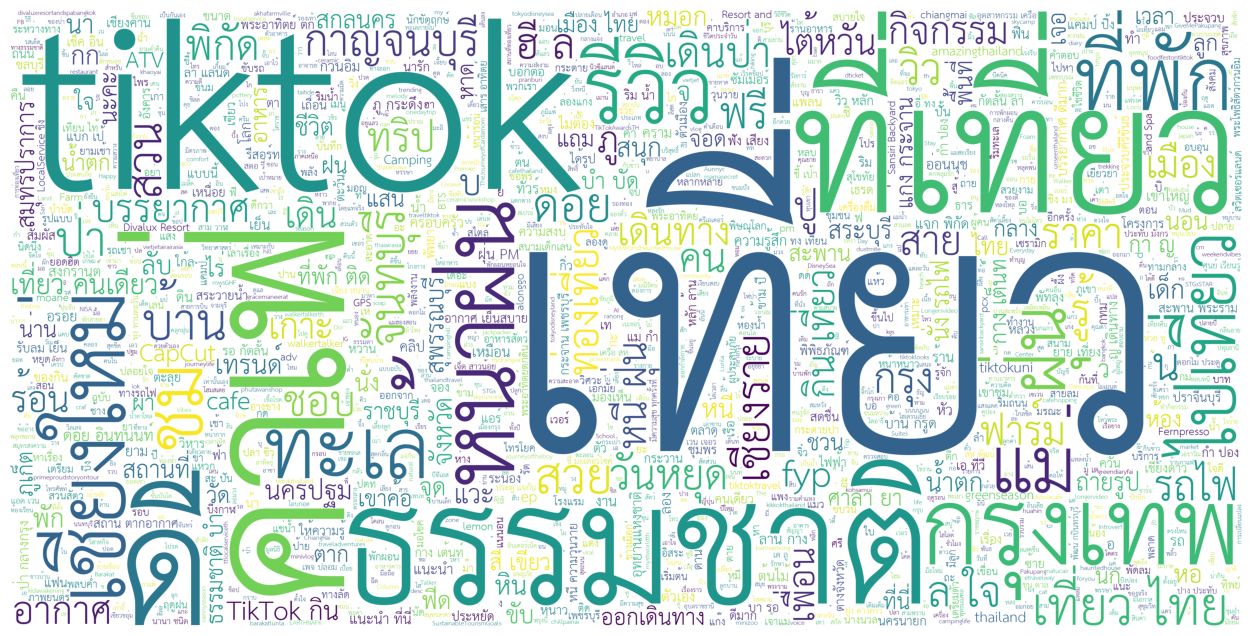

In [11]:
from wordcloud import WordCloud, STOPWORDS
df_word = df
word_all = " ".join(text for text in df_word ['text_tokens'])
reg = r"[ก-๙a-zA-Z']+"
fp = 'THSarabunNew.ttf'
wordcloud = WordCloud(stopwords=thai_stopwords, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(analyzer=lambda x:x.split(' '))
cvec.fit_transform(df['text_tokens'])
cvec.vocabulary_

{'Column': 91,
 '1': 21,
 'desc': 175,
 'คาเฟ่': 403,
 'สวย': 1121,
 'มา': 910,
 'ชม': 470,
 'นกแก้ว': 685,
 'ให้อาหาร': 1606,
 'ปลา': 777,
 'ครา': 379,
 'ฟ': 867,
 'ทานอาหาร': 638,
 'ริม': 998,
 'บึง': 749,
 'วิว': 1080,
 'สุด': 1163,
 'ที่': 649,
 'นก': 684,
 'TikTok': 137,
 'กิน': 326,
 'เที่ยว': 1385,
 'tiktok': 246,
 'พา': 854,
 'ทั้งปี': 630,
 '365': 58,
 'd': 174,
 'นครนายก': 686,
 'ที่เที่ยว': 658,
 '⛅️': 1665,
 'วันหยุด': 1070,
 'เสาร์': 1474,
 'อาทิตย์': 1264,
 'ใคร': 1591,
 'ยัง': 946,
 'ไม่': 1633,
 'มี': 919,
 'แพลน': 1532,
 'จะ': 443,
 'ไปเที่ยว': 1628,
 'ไหน': 1641,
 'แนะนำ': 1521,
 'ที่นี่': 654,
 'เลย': 1450,
 'ยยย': 941,
 'ใกล้': 1588,
 'กทม': 274,
 'ปทุมธานี': 762,
 'นี่เอง': 708,
 'ค่า': 422,
 '📍': 1730,
 'แกะ': 1496,
 'กะ': 306,
 'บัว': 740,
 'Farm': 103,
 'Cafe': 85,
 'and': 150,
 'restaurant': 233,
 '⏰': 1656,
 'เวลาเปิด': 1464,
 '-': 12,
 'ปิด': 795,
 '1000': 24,
 'น': 683,
 '2000': 43,
 'หยุด': 1199,
 'วัน': 1067,
 'อังคาร': 1255,
 'ยกเว้น': 940,
 '**': 9,
 'เป